In [2]:
# Dataset Extraction: Gold Prices (GC=F)
# Time period: January 2010 to December 2025

import yfinance as yf
import pandas as pd

# Define ticker and date range
ticker = "GC=F"   # Gold Futures
start_date = "2010-01-01"
end_date = "2025-12-31"

# Download data
df = yf.download(ticker, start=start_date, end=end_date)

# Reset index to make Date a column
df.reset_index(inplace=True)

# Save to CSV
file_name = "Gold_GC_F_2010_2025.csv"
df.to_csv(file_name, index=False)

# Basic verification
print("Gold dataset downloaded successfully!")
print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Dataset shape:", df.shape)
print(df.head())


/tmp/ipython-input-389447192.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Gold dataset downloaded successfully!
Date range: 2010-01-04 00:00:00 to 2025-12-30 00:00:00
Dataset shape: (4022, 6)
Price        Date        Close         High          Low         Open Volume
Ticker                    GC=F         GC=F         GC=F         GC=F   GC=F
0      2010-01-04  1117.699951  1122.300049  1097.099976  1117.699951    184
1      2010-01-05  1118.099976  1126.500000  1115.000000  1118.099976     53
2      2010-01-06  1135.900024  1139.199951  1120.699951  1135.900024    363
3      2010-01-07  1133.099976  1133.099976  1129.199951  1133.099976     56
4      2010-01-08  1138.199951  1138.199951  1122.699951  1138.199951     54


# Gold Futures (GC=F) – Clean + EDA

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#  Load dataset
# Remove the second header row if it exists
df = pd.read_csv("Gold_GC_F_2010_2025.csv",skiprows=[1])


Data type correction

In [4]:

df['Date'] = pd.to_datetime(df['Date'])

numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Set Date as index
df.set_index('Date', inplace=True)

In [5]:
print("Dataset info:")
print(df.info())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4022 entries, 2010-01-04 to 2025-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4022 non-null   float64
 1   High    4022 non-null   float64
 2   Low     4022 non-null   float64
 3   Open    4022 non-null   float64
 4   Volume  4022 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 188.5 KB
None


In [6]:
# Check missing values

print("Missing values before cleaning:")
print(df.isna().sum())

Missing values before cleaning:
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


Exploratory Data Analysis

Time Series Plot (Gold Futures Closing Price)

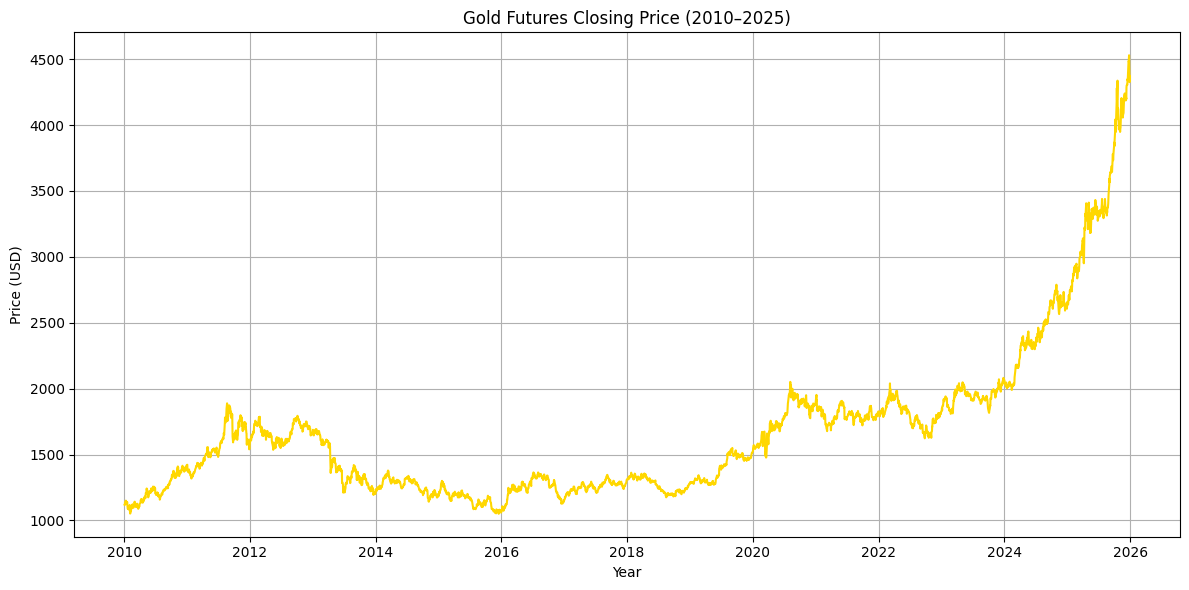

In [7]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'], color='gold')
plt.title("Gold Futures Closing Price (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.grid(True)
plt.show()

Normal Distribution of Features

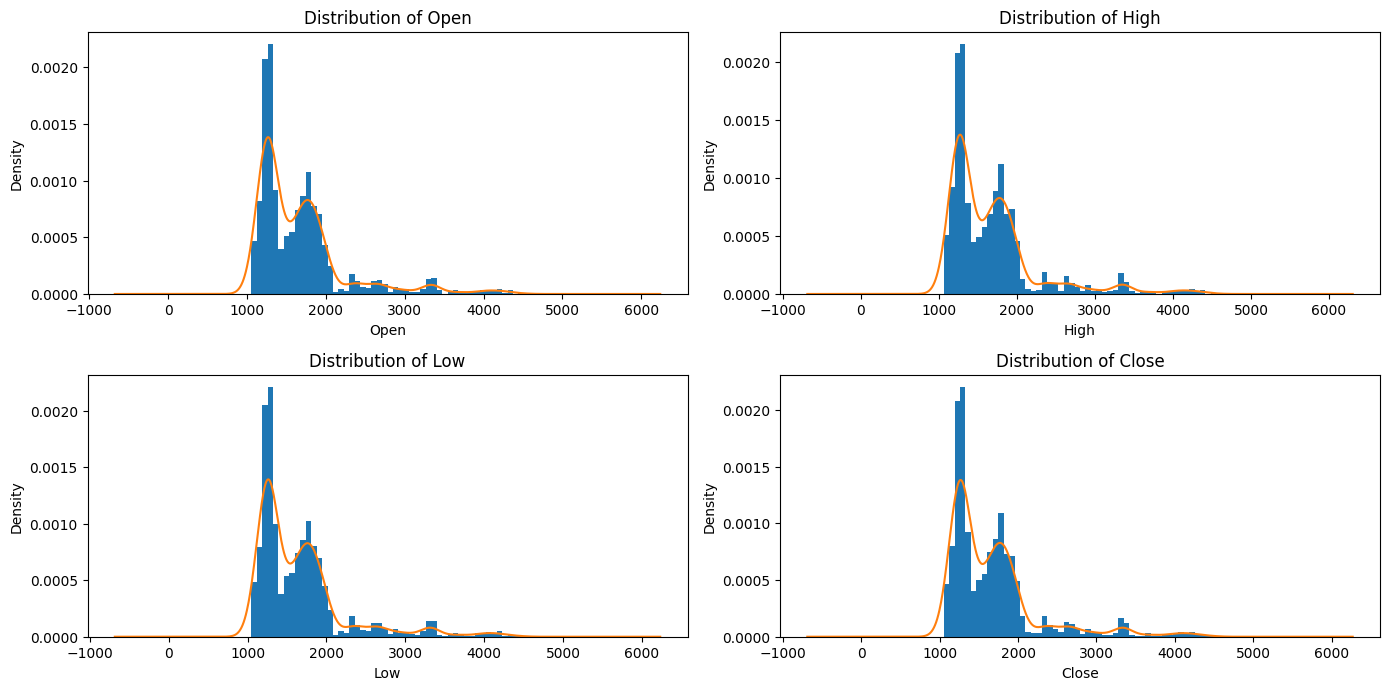

In [8]:
features = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(14,10))

for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    df[col].plot(kind='hist', bins=50, density=True)
    df[col].plot(kind='density')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


The distributions of Open, High, Low, and Close prices are right-skewed and non-normal, with multiple peaks. This reflects different market regimes over time rather than a single stable price level. The long right tail corresponds to recent years where gold prices increased sharply.

Boxplots Of Features

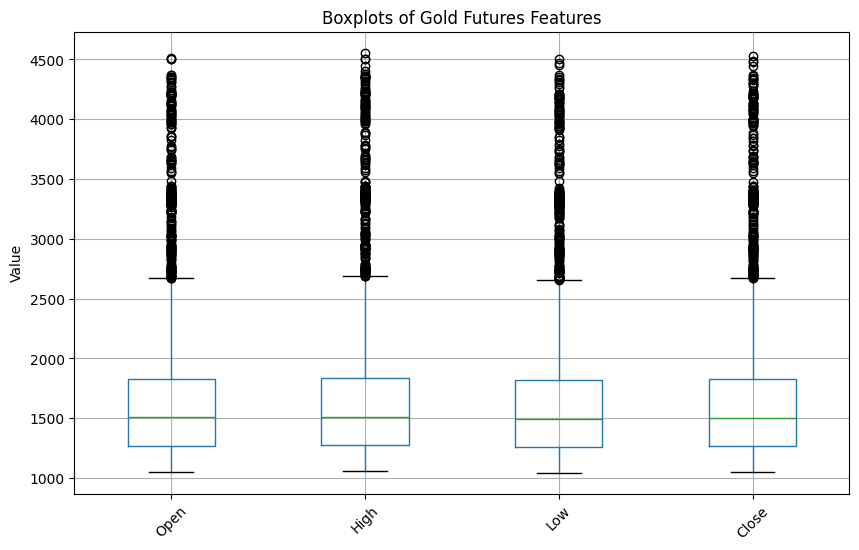

In [9]:
plt.figure(figsize=(10,6))
df[features].boxplot()
plt.title("Boxplots of Gold Futures Features")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The observed outliers are not errors. They occur because:
1.   Gold prices experienced structural shifts, not random noise
2.   Major economic events caused sharp upward price movements

The boxplot outliers represent genuine extreme market conditions and were retained to preserve the true dynamics of the gold price series.



Close Price Distribution with Mean, Median & Curve

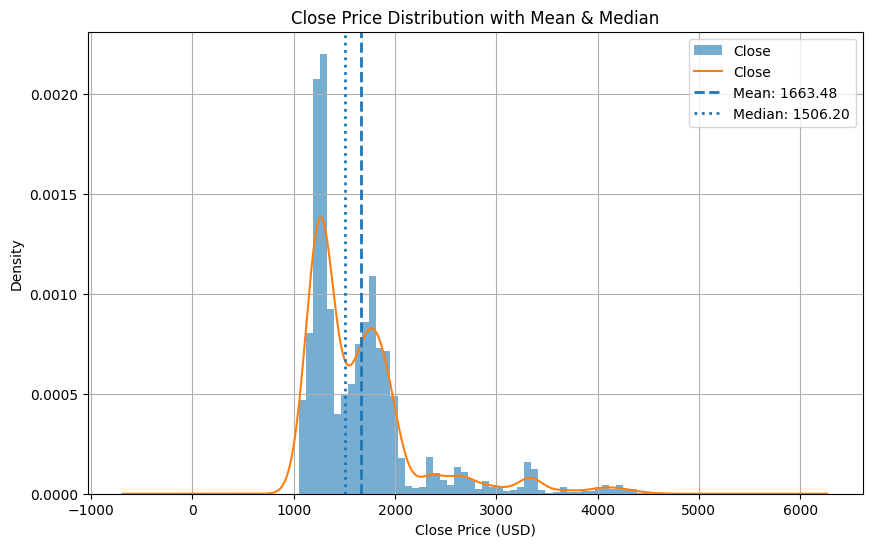

In [10]:
mean_close = df['Close'].mean()
median_close = df['Close'].median()

plt.figure(figsize=(10,6))
df['Close'].plot(kind='hist', bins=50, density=True, alpha=0.6)
df['Close'].plot(kind='density')

plt.axvline(mean_close, linestyle='--', linewidth=2, label=f"Mean: {mean_close:.2f}")
plt.axvline(median_close, linestyle=':', linewidth=2, label=f"Median: {median_close:.2f}")

plt.title("Close Price Distribution with Mean & Median")
plt.xlabel("Close Price (USD)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


Observation
*   Mean > Median
*   Indicates right-skewness
*   A small number of very high prices pull the mean upward

Interpretation

The divergence between mean and median confirms the asymmetric distribution of gold prices, driven by recent price surges in the later years of the dataset.

Year-wise Mean CLOSE Price – BAR PLOT

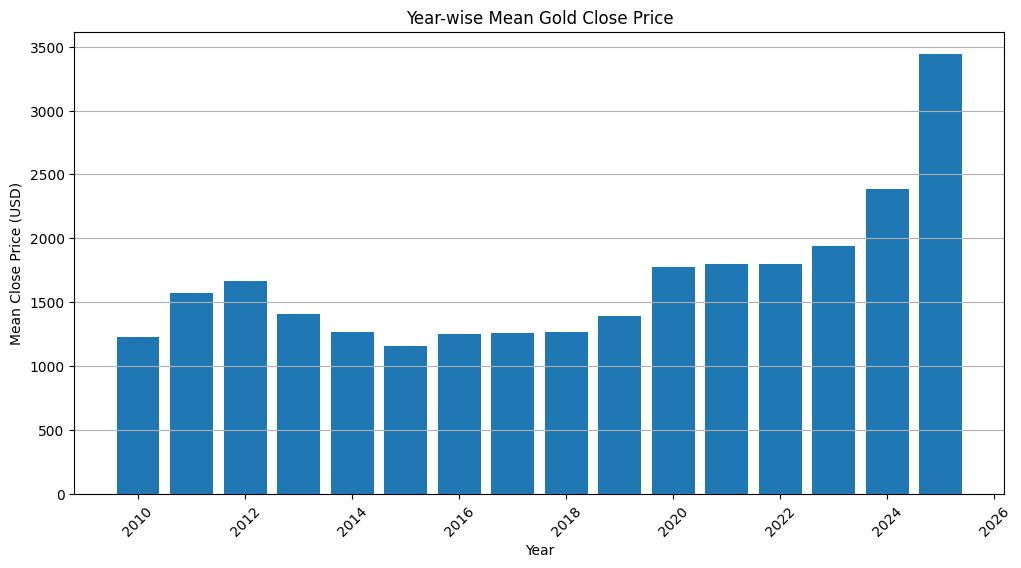

In [11]:
df['Year'] = df.index.year
yearly_mean_close = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(12,6))
plt.bar(yearly_mean_close.index, yearly_mean_close.values)
plt.title("Year-wise Mean Gold Close Price")
plt.xlabel("Year")
plt.ylabel("Mean Close Price (USD)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


The bar plot shows a clear long-term upward trend in gold prices with distinct phases. Prices rise sharply during 2010–2012, decline and stabilise between 2013–2019, and then increase significantly from 2020 onwards. The strong acceleration after 2022 reflects heightened economic uncertainty, inflationary pressures, and increased safe-haven demand, indicating a structural shift rather than short-term fluctuation.